In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path
from PIL import Image
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img
from sklearn.model_selection import train_test_split
from tensorflow.keras.initializers import random_uniform, glorot_uniform, constant, identity
from tensorflow.keras.layers import Dropout, Input, Add, Dense, Activation, BatchNormalization, Flatten, Conv2D, MaxPooling2D, GlobalMaxPooling2D
from tensorflow.keras.models import Model, load_model

In [2]:

from google.colab import files
uploaded = files.upload()

Saving UTKFace.zip to UTKFace.zip


In [3]:
import io
import zipfile
# Iterate over the uploaded files
for filename in uploaded.keys():
    # Check if the file is a zip file
    if filename.endswith('.zip'):
        # Read the contents of the zip file
        with zipfile.ZipFile(io.BytesIO(uploaded[filename]), 'r') as zip_ref:
            # Extract all contents to a directory
            zip_ref.extractall()

In [4]:
import os

# Specify the directory path of the extracted folder
folder_path = "UTKFace/"

# Get the list of all files in the directory
files_in_folder = os.listdir(folder_path)

# Count the number of files
number_of_files = len(files_in_folder)

# Print the number of files
print("Number of files in the extracted folder:", number_of_files)


Number of files in the extracted folder: 4154


In [5]:
np.random.seed(10)
np.random.shuffle(files_in_folder)

age_labels, gender_labels, image_path = [], [], []

for filename in files_in_folder:
    image_path.append(filename)
    temp = filename.split('_')
    age_labels.append(temp[0])
    gender_labels.append(temp[1])

In [6]:
image_path

['21_1_2_20170109132112364.jpg.chip.jpg',
 '20_1_1_20170116215855605.jpg.chip.jpg',
 '19_0_0_20170120133526566.jpg.chip.jpg',
 '16_0_0_20170110231707270.jpg.chip.jpg',
 '1_1_1_20161219155940125.jpg.chip.jpg',
 '18_0_1_20170114025501676.jpg.chip.jpg',
 '1_0_0_20170110213206043.jpg.chip.jpg',
 '22_0_1_20170113193211629.jpg.chip.jpg',
 '1_1_0_20170109191021631.jpg.chip.jpg',
 '10_1_0_20170109203501969.jpg.chip.jpg',
 '23_0_0_20170113210126449.jpg.chip.jpg',
 '1_1_4_20161221193821215.jpg.chip.jpg',
 '21_1_0_20170109213135260.jpg.chip.jpg',
 '1_1_2_20161219202727078.jpg.chip.jpg',
 '18_1_0_20170105002457379.jpg.chip.jpg',
 '1_0_2_20161219220247471.jpg.chip.jpg',
 '17_1_0_20170109214546339.jpg.chip.jpg',
 '10_1_1_20170109204636561.jpg.chip.jpg',
 '22_0_2_20170116220743409.jpg.chip.jpg',
 '1_0_2_20161219142039985.jpg.chip.jpg',
 '22_1_0_20170117141120129.jpg.chip.jpg',
 '1_0_2_20161219204156668.jpg.chip.jpg',
 '10_0_0_20170110221811823.jpg.chip.jpg',
 '23_0_2_20170116172805150.jpg.chip.jpg',


In [ ]:
df = pd.DataFrame()
df['image'], df['age'], df['gender'] = image_path, age_labels, gender_labels

In [ ]:
df.head()

,image,age,gender
0,1_1_2_20161219162415934.jpg.chip.jpg,1,1
1,22_1_0_20170112192312350.jpg.chip.jpg,22,1
2,20_0_0_20170120133547085.jpg.chip.jpg,20,0
3,1_0_2_20161219155902022.jpg.chip.jpg,1,0
4,14_0_0_20170110231557039.jpg.chip.jpg,14,0


In [ ]:
gender_dict = {0:"Male",1:"Female"}

In [ ]:
df = df.astype({'age':'float32', 'gender': 'int32'})

In [ ]:
print(df.dtypes)

image      object
age       float32
gender      int32
dtype: object


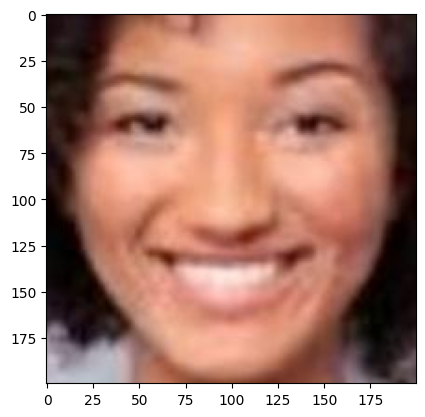

In [ ]:
img = Image.open("UTKFace/"+df.image[1])
plt.imshow(img)

<ipython-input-13-36725a16e635>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.age)


<Axes: xlabel='age', ylabel='Density'>

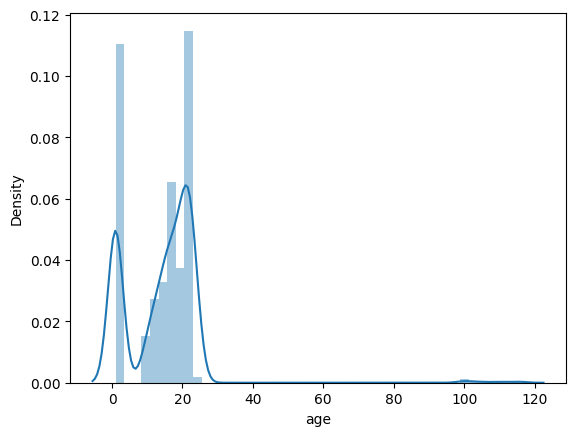

In [ ]:
sns.distplot(df.age)

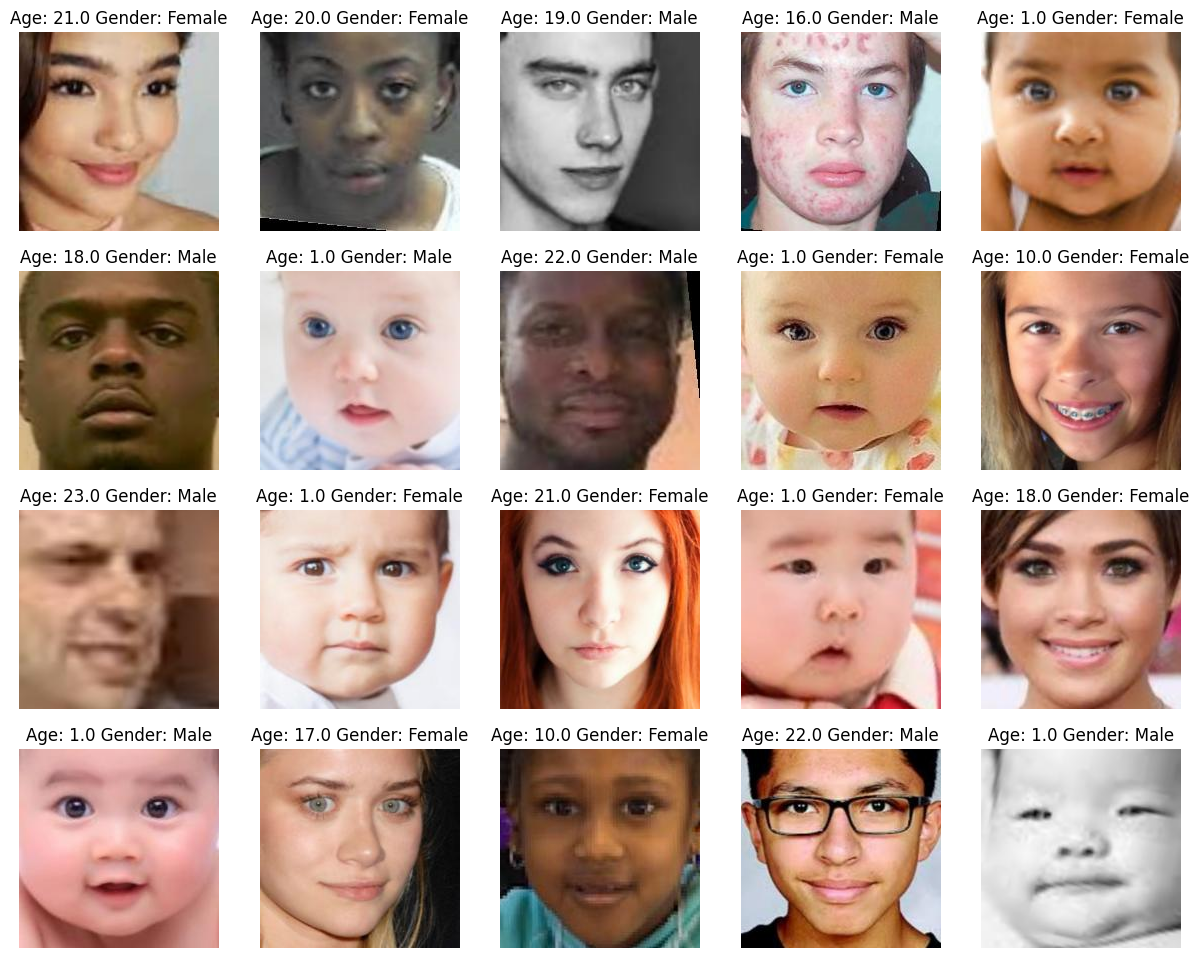

In [ ]:
files = df.iloc[0:20]
plt.figure(figsize=(15,15))
for index, file, age, gender in files.itertuples():
    plt.subplot(5,5, index+1)
    img = load_img("UTKFace/"+file)
    img = np.array(img)
    plt.imshow(img)
    plt.title(f"Age: {age} Gender: {gender_dict[gender]}")
    plt.axis('off')

In [ ]:
train, test = train_test_split(df, test_size=0.85, random_state=42)

In [ ]:
train.head()

,image,age,gender
1782,12_1_3_20161220222343139.jpg.chip.jpg,12.0,1
335,18_1_0_20170109213109287.jpg.chip.jpg,18.0,1
2839,23_0_2_20170116172904718.jpg.chip.jpg,23.0,0
3087,21_1_1_20170116175832136.jpg.chip.jpg,21.0,1
515,15_0_0_20170110232322390.jpg.chip.jpg,15.0,0


In [ ]:
#converting Image to numpy array (extracting feature)
x_train = []
for file in train.image:
    img = load_img("UTKFace/"+file, grayscale=True)
    img = img.resize((128,128), Image.ANTIALIAS)
    img = np.array(img)
    x_train.append(img)

x_train = np.array(x_train)

x_train = x_train.reshape(len(x_train), 128,128,1)

/usr/local/lib/python3.10/dist-packages/keras/src/utils/image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(
<ipython-input-18-01901eb87d5d>:5: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((128,128), Image.ANTIALIAS)


In [ ]:
x_train.shape

(623, 128, 128, 1)

In [ ]:
x_train = x_train/255

In [ ]:
y_gender = np.array(train.gender)
y_age = np.array(train.age)

In [ ]:
input_size = (128,128,1)

In [ ]:
inputs = Input((input_size))
X = Conv2D(64, (3, 3), activation='relu', kernel_initializer = glorot_uniform(seed=0))(inputs)
X = BatchNormalization(axis = 3)(X)
X = MaxPooling2D((3, 3))(X)

X = Conv2D(128, (3, 3), activation='relu')(X)
X = MaxPooling2D((2, 2), strides=(2, 2))(X)

X = Conv2D(256, (3, 3), activation='relu')(X)
X = MaxPooling2D((2, 2))(X)

X = Flatten()(X)

dense_1 = Dense(256, activation='relu')(X)
dense_2 = Dense(256, activation='relu' )(X)
dense_3 = Dense(128, activation='relu' )(dense_2)
dropout_1 = Dropout(0.4)(dense_1)
dropout_2 = Dropout(0.4)(dense_3)
output_1 = Dense(1,activation='sigmoid', name='gender_output')(dropout_1)
output_2 = Dense(1, activation='relu', name='age_output')(dropout_2)
model = Model(inputs=[inputs], outputs=[output_1,output_2])

In [ ]:
model.compile(loss=['binary_crossentropy','mae'], optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 128, 1)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 126, 126, 64)         640       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 126, 126, 64)         256       ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 42, 42, 64)           0         ['batch_normalization[0][0

In [ ]:

model_history=model.fit(x=x_train, y=[y_gender, y_age], batch_size = 10, epochs=20, validation_split= 0.1)

Epoch 1/20
56/56 [==============================] - 45s 768ms/step - loss: 8.5273 - gender_output_loss: 0.8264 - age_output_loss: 7.7009 - gender_output_accuracy: 0.5750 - age_output_accuracy: 0.2804 - val_loss: 13.7935 - val_gender_output_loss: 0.6907 - val_age_output_loss: 13.1028 - val_gender_output_accuracy: 0.6508 - val_age_output_accuracy: 0.0000e+00
Epoch 2/20
56/56 [==============================] - 43s 773ms/step - loss: 6.1594 - gender_output_loss: 0.6383 - age_output_loss: 5.5211 - gender_output_accuracy: 0.6375 - age_output_accuracy: 0.2304 - val_loss: 13.5348 - val_gender_output_loss: 0.6853 - val_age_output_loss: 12.8495 - val_gender_output_accuracy: 0.7619 - val_age_output_accuracy: 0.0159
Epoch 3/20
56/56 [==============================] - 40s 716ms/step - loss: 5.9964 - gender_output_loss: 0.5804 - age_output_loss: 5.4160 - gender_output_accuracy: 0.6929 - age_output_accuracy: 0.1393 - val_loss: 12.4600 - val_gender_output_loss: 0.6774 - val_age_output_loss: 11.7825 - 

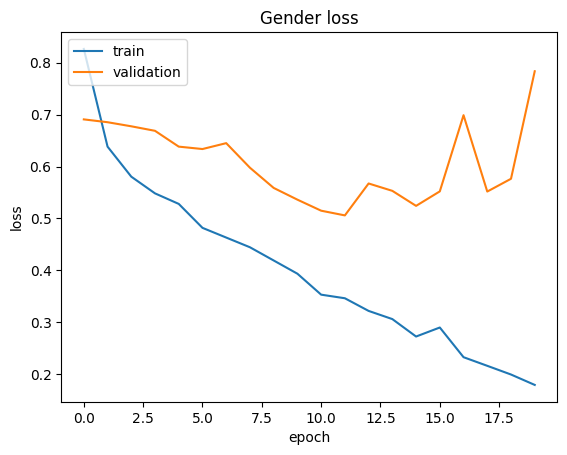

In [ ]:

plt.plot(model_history.history['gender_output_loss'])
plt.plot(model_history.history['val_gender_output_loss'])
plt.title('Gender loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

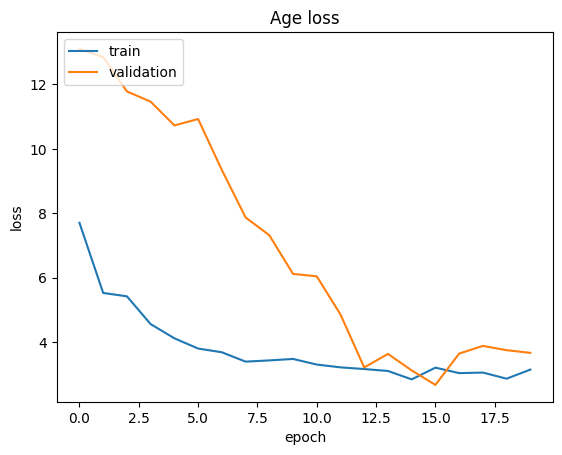

In [ ]:
plt.plot(model_history.history['age_output_loss'])
plt.plot(model_history.history['val_age_output_loss'])
plt.title('Age loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Original: Gender =  Female  Age =  23.0
1/1 [==============================] - 0s 376ms/step
Prediction: Gender =  Female  Age =  17


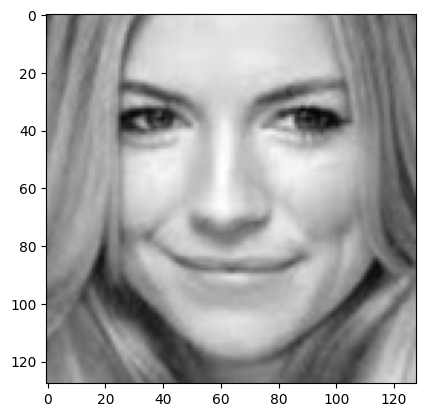

In [ ]:
index=50
print("Original: Gender = ", gender_dict[y_gender[index]]," Age = ", y_age[index])

pred = model.predict(x_train[index].reshape(1, 128, 128, 1))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])

print("Prediction: Gender = ", pred_gender," Age = ", pred_age)
plt.imshow(x_train[index].reshape(128,128), cmap='gray')

Original: Gender =  Female  Age =  20.0
1/1 [==============================] - 0s 131ms/step
Prediction: Gender =  Female  Age =  15


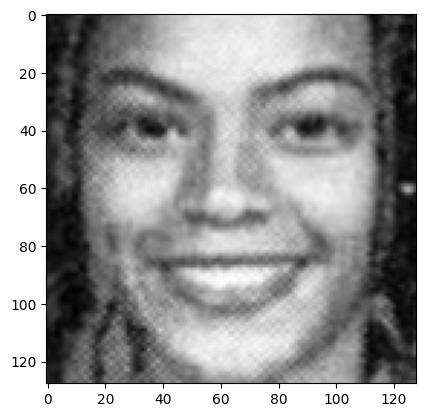

In [ ]:
index=19
print("Original: Gender = ", gender_dict[y_gender[index]]," Age = ", y_age[index])

pred = model.predict(x_train[index].reshape(1, 128, 128, 1))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])

print("Prediction: Gender = ", pred_gender," Age = ", pred_age)
plt.imshow(x_train[index].reshape(128,128), cmap='gray')

1/1 [==============================] - 0s 47ms/step


<ipython-input-34-46863b4a75d8>:5: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((128, 128), Image.ANTIALIAS)


Predicted Gender: Female
Predicted Age: 13


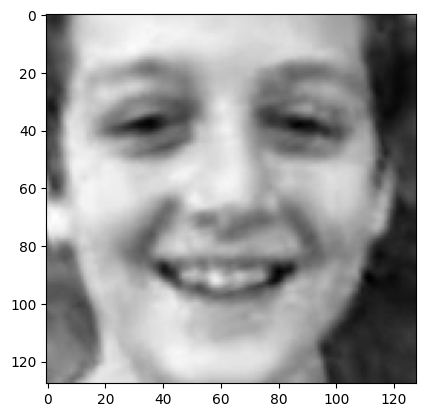

In [ ]:


import matplotlib.pyplot as plt
import numpy as np
image_path = input("enter the path:")
img = Image.open(image_path).convert('L')
img = img.resize((128, 128), Image.ANTIALIAS)
img = np.array(img)
img = img.reshape(1, 128, 128, 1)
img = img / 255.0

# Make prediction
pred = model.predict(img)
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])

# Print the results
print("Predicted Gender:", pred_gender)
print("Predicted Age:", pred_age)

# Show the image
plt.imshow(img.reshape(128, 128), cmap="gray")
plt.show()
